## Type of User who Share no Bike for all Trips and their Distributions across Variables of Interest.

### Investigation Overview

In this investigation, I like to inspect the stations mostly and rarely used by the users. The main focus is to look at the user type who did not share their bikes for all trips. Also, to look deeply by comparing with other variables like member gender and duration covered.

### Dataset Overview
The Dataset consists 183412 observations and 16 variables like stations, member birth year, user type, member_gender, bike share for all trips, duration and so on. A little percentage of the dataset contains null values mostly in the variables of interest. These were dropped because they are categorical observations. 

In [1]:
#this cell contains the statements used to import the packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#set canvas design
sns.set_style('ticks')

In [2]:
# load in the dataset into a pandas dataframe
dv = pd.read_csv('cleaned_data.csv')

In [3]:
#wrangling, removing decimals frm member birth year
#convert to string data type
dv['member_birth_year'] = dv['member_birth_year'].astype(str)
#remove the decimals
dv['member_birth_year'] = dv['member_birth_year'].apply(lambda x: x.split('.0')[0])
#convert the birth year to float
dv['member_birth_year'] = dv['member_birth_year'].astype(int)

In [4]:
# data wrangling, dropping the null values
dv.dropna(inplace=True)

## Distribution of User Type

This investigation shows the number of observations occupied by each User Type. A large proportion of the dataset are subscribers.

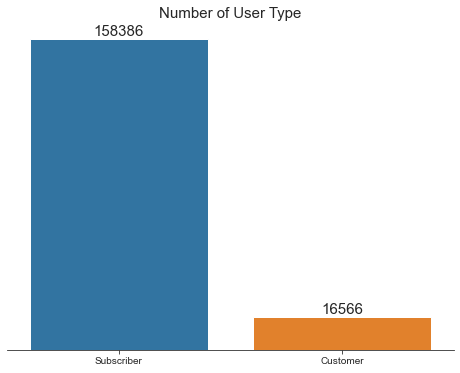

In [5]:
#set canvas size
plt.figure(figsize=(8,6))


plots = sns.countplot(x='user_type', data=dv, order=['Subscriber', 'Customer'])

#add annotation using matplotlib annotate function
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Number of User Type', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 14})

# Remove unnecessary features 
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

## Distribution of Gender

This inspection also shows how Gender is being shared across the dataset. After the inspection, The most riders in the Dataset are Male

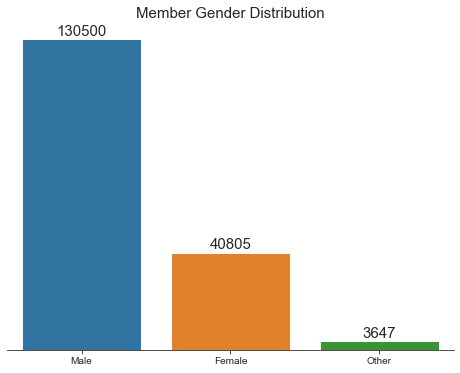

In [6]:
#set canvas size
plt.figure(figsize=(8,6))

#plotting and customization
plots = sns.countplot(x='member_gender', data=dv, order=['Male', 'Female','Other'])
plt.title('Member Gender Distribution', {'fontsize': 15})
plt.xlabel('Member Gender', {'fontsize': 14})

#add annotation using matplotlib annotate function
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
# Remove unnecessary features 
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

## Mostly and Rarely Used Stations

Here the stations that are mainly and rarely used both for Start and End is inspected and listed below.

In [7]:
#cut just 10 stations across each start and end stations
most_start_station = dv['start_station_name'].value_counts().head(10)
least_start_station = dv['start_station_name'].value_counts().tail(10)
most_end_station = dv['end_station_name'].value_counts().head(10)
least_end_station = dv['end_station_name'].value_counts().tail(10)

In [8]:
print('Below is the List of Most patroled Stations: \n')
#check for the most patroled stations
for s in most_start_station.index:
    if s in most_end_station.index:
        print(s)

Below is the List of Most patroled Stations: 

Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Powell St BART Station (Market St at 4th St)
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
Steuart St at Market St
Powell St BART Station (Market St at 5th St)


In [9]:
print('Below is the List of Least patroled Stations: \n')

#check for the least patroled stations
for s in least_start_station.index:
    if s in least_end_station.index:
        print(s)

Below is the List of Least patroled Stations: 

Backesto Park (Jackson St at 13th St)
Leavenworth St at Broadway
Taylor St at 9th St
Farnam St at Fruitvale Ave
Willow St at Vine St
Parker Ave at McAllister St
21st Ave at International Blvd
Palm St at Willow St
16th St Depot


## Distribution of bike Share for all Trips

This investigation depicts the distribution, wether most riders share their bike or not across the entire dataset. After which it was proven that a larger percentage (90.1%) do not share their bikes for all trips.

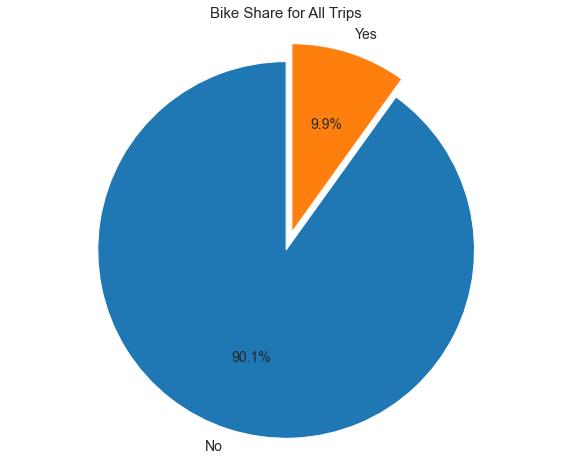

In [10]:
plt.figure(figsize=(10,8))

#create a pie chart and customization
plt.pie(x=dv['bike_share_for_all_trip'].value_counts(), startangle=90, 
        labels= dv['bike_share_for_all_trip'].value_counts().index, 
       autopct = '%1.1f%%', textprops={'fontsize': 14},
       explode=[0.1,0])
plt.title('Bike Share for All Trips', {'fontsize': 15})
plt.axis('equal');

## Bike Share for all Trips by Average Duration

I look at the average duration covered by those who share their bikes for all trips and those who dont and compare. I noticed the value are quite close to each other as shown below. The central tendency is obviously far; good. this is as a rsult of some spike up in the observations (duration) of those who share their bikes (yes) in the dataset.

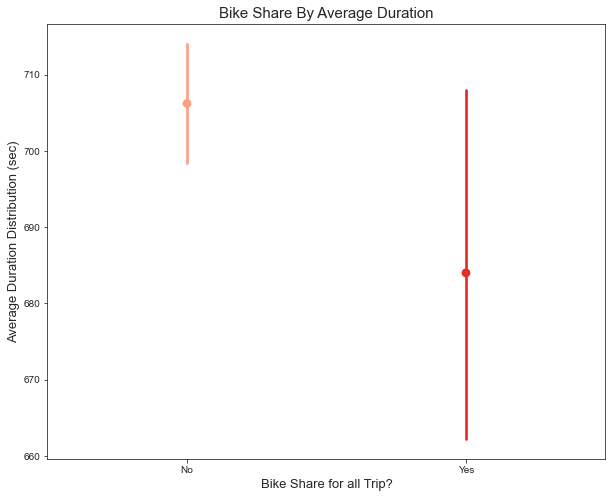

In [11]:
plt.figure(figsize=(10,8))

sns.pointplot(data = dv, x = 'bike_share_for_all_trip', y = 'duration_sec',
             palette = 'Reds', linestyles = '', dodge = 0.5)

plt.title('Bike Share By Average Duration', {'fontsize': 15})
plt.xlabel('Bike Share for all Trip?', {'fontsize': 13})
plt.ylabel('Average Duration Distribution (sec)', {'fontsize': 13});

## Distribution of User Type and Member Gender by Duration

I further look into how the member gender is distributed across each user type and the whole distribtion across the dataset by Duration. As earlier discussed, it can be deeply figured out here that, Male gender surpasses other gender type in both customer and subscriber user type. One point i noticed here is the all those who share their bike for all trip are subscribers. Amazing. lets look into it more in the last visualization. 

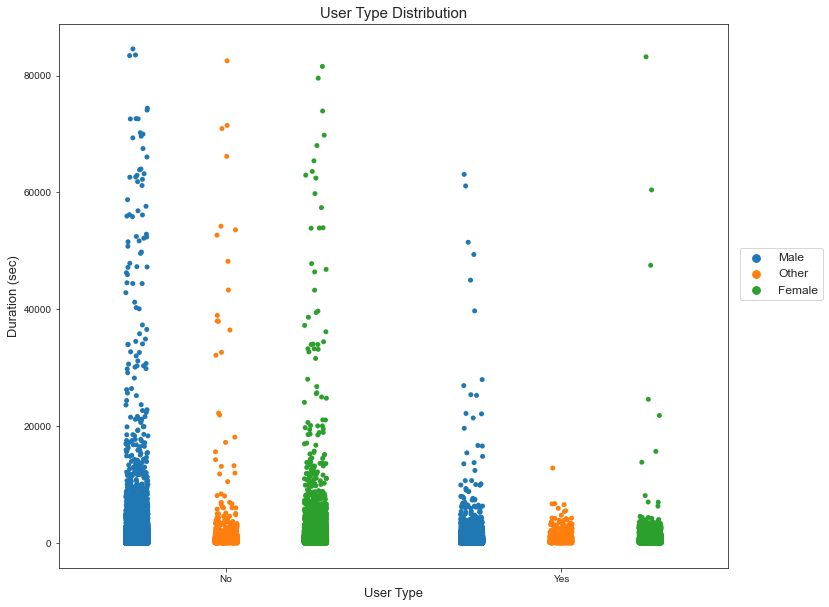

In [12]:
#set canvas size
plt.figure(figsize=(12,10))

#plotting
sns.stripplot(x='bike_share_for_all_trip', 
            y='duration_sec',
            data=dv,
            jitter=True,
            order=['No', 'Yes'], 
            hue='member_gender',
            dodge=True)

#plot customization
plt.title('User Type Distribution', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 13})
plt.ylabel('Duration (sec)', {'fontsize': 13})
plt.legend(bbox_to_anchor = (1.15, 0.6), fontsize=12);

## Distribution of Bike Share for all Trip across User type by Average Duration

After this investigation and visualization, something that caught my eyes is the fact that their is no single customer who share their bike for all trip. As early said, this visual demonstrates the point. 

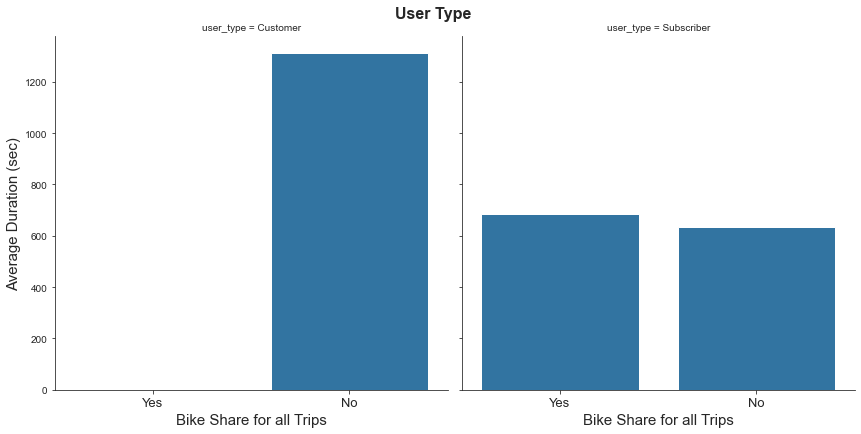

In [13]:
g = sns.FacetGrid(data = dv, col = 'user_type', palette = sns.color_palette()[0:1], height=6)
g.map(sns.barplot, 'bike_share_for_all_trip', 'duration_sec', order = ['Yes', 'No'],  ci=False)

# Title for the complete figure
g.fig.suptitle("User Type" ,
               fontsize = 16 , 
               fontweight = 'bold' )

# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.91 )

g.set_xticklabels(fontsize= 13)
g.set_axis_labels( "Bike Share for all Trips" , "Average Duration (sec)", fontsize= 15);

In [ ]:
!jupyter nbconvert slpart_ll.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slpart_ll.ipynb to slides
[NbConvertApp] Writing 749217 bytes to slpart_ll.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slpart_ll.slides.html
Use Control-C to stop this server
